In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

fnames = ['totalArea', 'roofedSurface', 'bedrooms', 'bathrooms', 'halfBathrooms',
            'antiquity', 'parkingSlots', 'priceAmount', 'priceCurrencyId']

# Urbania Buy postings


In [3]:
buy_df = pd.read_csv("san_isidro_buy.csv")
buy_df = buy_df.filter(items=fnames)
buy_df["pricePerMt2"] = buy_df.apply(lambda x: x['priceAmount']/x['roofedSurface'], axis=1)

y = buy_df['priceAmount']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
buy_df_filtered = buy_df[removed_outliers]

y = buy_df_filtered['roofedSurface']
removed_outliers = y.between(y.quantile(.01), y.quantile(.91))
buy_df_filtered = buy_df_filtered[removed_outliers]

buy_df_filtered = buy_df_filtered[buy_df.priceCurrencyId.eq(6)]
buy_df_filtered = buy_df_filtered[buy_df.bedrooms != 0]
buy_df_filtered = buy_df_filtered[buy_df.bathrooms != 0]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


## Buy examples

In [4]:
print(buy_df_filtered.head())

   totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  antiquity  \
0      155.0          155.0         2          2            0.0          4   
1      232.0          232.0         3          4            0.0          3   
2      150.0          150.0         3          4            0.0          4   
3      137.0          137.0         3          2            0.0          5   
4      125.0          125.0         3          2            0.0          5   

   parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
0           2.0       954750                6  6159.677419  
1           3.0      1660000                6  7155.172414  
2           2.0      1023000                6  6820.000000  
3           2.0       940500                6  6864.963504  
4           1.0       832500                6  6660.000000  


## Buy Description

In [5]:
print(buy_df_filtered.describe())

        totalArea  roofedSurface    bedrooms   bathrooms  halfBathrooms  \
count  781.000000     781.000000  781.000000  781.000000     113.000000   
mean   198.083227     178.956466    2.699104    3.215109       0.415929   
std     72.712038      52.502070    0.628683    0.819523       0.512795   
min     45.000000      60.000000    1.000000    1.000000       0.000000   
25%    147.000000     139.000000    2.000000    3.000000       0.000000   
50%    199.000000     185.000000    3.000000    3.000000       0.000000   
75%    235.000000     220.000000    3.000000    4.000000       1.000000   
max    440.000000     290.000000    5.000000    5.000000       2.000000   

        antiquity  parkingSlots   priceAmount  priceCurrencyId   pricePerMt2  
count  781.000000    641.000000  7.810000e+02            781.0    781.000000  
mean     2.160051      2.244930  1.808434e+06              6.0   9879.277045  
std      1.339247      0.718664  7.719952e+05              0.0   2247.240674  
min     

## Buy Correlation

In [6]:
print(buy_df_filtered.corr())

                 totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
totalArea         1.000000       0.812798  0.441231   0.522639       0.100529   
roofedSurface     0.812798       1.000000  0.573526   0.610990       0.093793   
bedrooms          0.441231       0.573526  1.000000   0.581157      -0.002870   
bathrooms         0.522639       0.610990  0.581157   1.000000      -0.252678   
halfBathrooms     0.100529       0.093793 -0.002870  -0.252678       1.000000   
antiquity         0.061162       0.081767  0.107521  -0.052435      -0.101282   
parkingSlots      0.437140       0.553777  0.325627   0.448101       0.176066   
priceAmount       0.807506       0.845756  0.437801   0.564188       0.072135   
priceCurrencyId        NaN            NaN       NaN        NaN            NaN   
pricePerMt2       0.475122       0.343477  0.087974   0.310735       0.026634   

                 antiquity  parkingSlots  priceAmount  priceCurrencyId  \
totalArea         0.061162      0.

# Urbania Rent postings

In [7]:
rent_df = pd.read_csv("san_isidro_rent.csv")
rent_df = rent_df.filter(items=fnames)
rent_df["pricePerMt2"] = rent_df.apply(lambda x: x['priceAmount']/x['roofedSurface'], axis=1)

y = rent_df['priceAmount']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
rent_df_filtered = rent_df[removed_outliers]

y = rent_df_filtered['roofedSurface']
removed_outliers = y.between(y.quantile(.01), y.quantile(.91))
rent_df_filtered = rent_df_filtered[removed_outliers]

rent_df_filtered = rent_df_filtered[rent_df.priceCurrencyId.eq(6)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


## Rent examples

In [8]:
print(rent_df_filtered.head())

   totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  antiquity  \
0      196.0          196.0         3          3            0.0          5   
1       80.0           80.0         1          2            0.0          2   
2      220.0          220.0         4          4            1.0          5   
3       62.0           62.0         1          1            0.0          5   
5       45.0           45.0         1          1            0.0          5   

   parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
0           2.0         6270                6    31.989796  
1           1.0         2988                6    37.350000  
2           1.0         8325                6    37.840909  
3           1.0         2516                6    40.580645  
5           NaN         2547                6    56.600000  


## Rent description

In [9]:
print(rent_df_filtered.describe())

        totalArea  roofedSurface    bedrooms   bathrooms  halfBathrooms  \
count  170.000000     170.000000  170.000000  170.000000      75.000000   
mean   180.323529     159.411765    2.400000    2.588235       0.453333   
std    133.134607      86.892342    1.028586    1.041098       0.527445   
min     42.000000      42.000000    0.000000    1.000000       0.000000   
25%    100.000000     100.000000    2.000000    2.000000       0.000000   
50%    140.000000     135.000000    3.000000    3.000000       0.000000   
75%    208.750000     200.000000    3.000000    3.000000       1.000000   
max    618.000000     377.000000    4.000000    5.000000       2.000000   

        antiquity  parkingSlots   priceAmount  priceCurrencyId  pricePerMt2  
count  170.000000    159.000000    170.000000            170.0   170.000000  
mean     3.523529      1.761006   6107.376471              6.0    38.957802  
std      1.231745      0.733115   3943.646021              0.0     9.140106  
min      1.0

## Rent correlation

In [10]:
print(rent_df_filtered.corr())

                 totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
totalArea         1.000000       0.931722  0.691227   0.623949       0.298383   
roofedSurface     0.931722       1.000000  0.773805   0.717007       0.394120   
bedrooms          0.691227       0.773805  1.000000   0.729382       0.289161   
bathrooms         0.623949       0.717007  0.729382   1.000000       0.134799   
halfBathrooms     0.298383       0.394120  0.289161   0.134799       1.000000   
antiquity        -0.069597      -0.050677  0.039231   0.007600       0.042872   
parkingSlots      0.703421       0.727143  0.550218   0.599412       0.112896   
priceAmount       0.929618       0.909216  0.633863   0.611876       0.296126   
priceCurrencyId        NaN            NaN       NaN        NaN            NaN   
pricePerMt2       0.021168      -0.130400 -0.297104  -0.205387      -0.301906   

                 antiquity  parkingSlots  priceAmount  priceCurrencyId  \
totalArea        -0.069597      0.

# Buy price/mt2 = [bedrooms + parking slots] x bathrooms

In [11]:
buy_price_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='pricePerMt2', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_price_per_bedroom_and_bathroom)

bathrooms        1         2         3         4         5
bedrooms                                                  
1          8407.65  10032.54  10868.28       NaN       NaN
2          8527.15   8545.55   9785.90   9107.35       NaN
3          7143.51   7968.53   9522.20  10706.35  10987.61
4              NaN   8569.85  10463.90  10403.75  11153.11
5              NaN       NaN  10468.75       NaN       NaN


# Buy count = [bedrooms + parking slots] x bathrooms


In [12]:
buy_priceAmount_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='priceAmount', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_priceAmount_per_bedroom_and_bathroom)

bathrooms          1           2           3           4           5
bedrooms                                                            
1           608826.0  1059852.10  1371357.14         NaN         NaN
2           516763.8  1045641.63  1517887.59  1641978.33         NaN
3          1108632.5  1281819.19  1758743.31  2288525.89  2311038.48
4                NaN  1165500.00  2747300.00  2628743.00  2613602.75
5                NaN         NaN  2093750.00         NaN         NaN


# Buy count = [bedrooms + parking slots] x bathrooms

In [13]:
buy_roofedSurface_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='roofedSurface', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_roofedSurface_bedroom_and_bathroom)

bathrooms      1       2       3       4       5
bedrooms                                        
1           69.6  104.12  129.00     NaN     NaN
2           60.6  123.39  151.73  175.33     NaN
3          156.5  158.66  180.07  213.44  210.52
4            NaN  136.00  260.00  247.00  229.38
5            NaN     NaN  200.00     NaN     NaN


# Rent price/mt2 = [bedrooms + parking slots] x bathrooms

In [14]:
rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='pricePerMt2', index=['bedrooms'], 
                                                     columns=['bathrooms'], aggfunc=np.mean).round(2)
count_rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='pricePerMt2', index=['bedrooms'], 
                                                           columns=['bathrooms'], aggfunc='count').round(2)
print(rent_price_per_bedroom_and_bathroom)
print(count_rent_price_per_bedroom_and_bathroom)

bathrooms      1      2      3      4      5
bedrooms                                    
0            NaN  32.63  39.58    NaN    NaN
1          46.74  44.91  37.35    NaN    NaN
2          30.18  38.69  39.93  31.51    NaN
3          26.37  32.76  35.69  39.61    NaN
4            NaN  32.46  37.76  41.08  29.05
bathrooms     1     2     3     4    5
bedrooms                              
0           NaN   2.0   1.0   NaN  NaN
1          27.0   9.0   2.0   NaN  NaN
2           2.0  21.0  14.0   2.0  NaN
3           1.0  15.0  36.0  16.0  NaN
4           NaN   1.0   4.0  14.0  3.0


## Andres Real State index

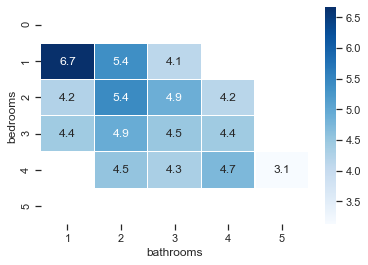

In [15]:
andres_index = (rent_price_per_bedroom_and_bathroom * 12) / buy_price_per_bedroom_and_bathroom * 100
sns.heatmap(andres_index, annot=True, linewidths=.100, cmap='Blues')

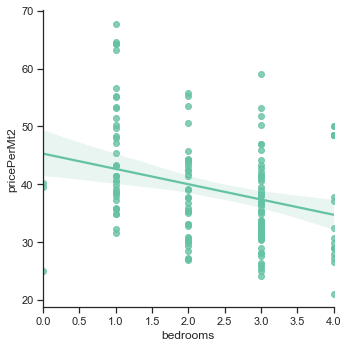

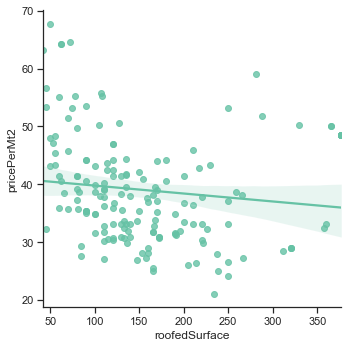

In [16]:
# Create the scatter plot
sns.lmplot(x="bedrooms", y="pricePerMt2", data=rent_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

sns.lmplot(x="roofedSurface", y="pricePerMt2", data=rent_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

# plt.show()

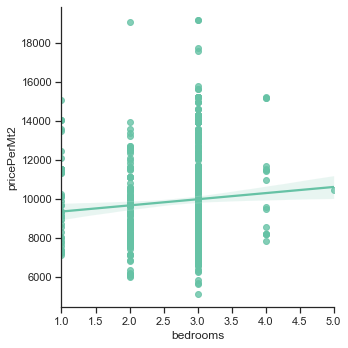

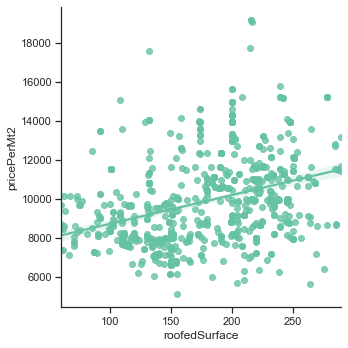

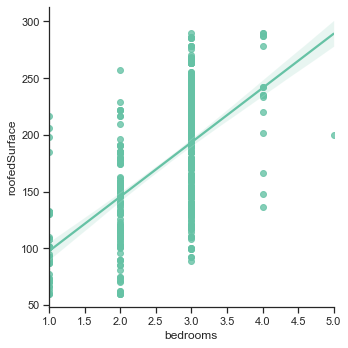

In [17]:
sns.lmplot(x="bedrooms", y="pricePerMt2", data=buy_df_filtered)
sns.despine()

sns.lmplot(x="roofedSurface", y="pricePerMt2", data=buy_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

sns.lmplot(x="bedrooms", y="roofedSurface", data=buy_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

In [18]:
buy_1x1_df_filtered = buy_df_filtered[buy_df_filtered.bedrooms == 1]
buy_1x1_df_filtered = buy_1x1_df_filtered[buy_1x1_df_filtered.bathrooms == 1]
print(buy_1x1_df_filtered.describe())

        totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
count    5.000000       5.000000       5.0        5.0            0.0   
mean    71.200000      69.600000       1.0        1.0            NaN   
std     33.536547      17.728508       0.0        0.0            NaN   
min     45.000000      60.000000       1.0        1.0            NaN   
25%     60.000000      60.000000       1.0        1.0            NaN   
50%     60.000000      61.000000       1.0        1.0            NaN   
75%     61.000000      66.000000       1.0        1.0            NaN   
max    130.000000     101.000000       1.0        1.0            NaN   

       antiquity  parkingSlots   priceAmount  priceCurrencyId   pricePerMt2  
count   5.000000           1.0  5.000000e+00              5.0      5.000000  
mean    1.400000           1.0  6.088260e+05              6.0   8407.649955  
std     0.894427           NaN  3.107923e+05              0.0   1837.338276  
min     1.000000           1.0  4.41032

In [19]:
buy_2x2_df_filtered = buy_df_filtered[buy_df_filtered.bedrooms == 2]
buy_2x2_df_filtered = buy_2x2_df_filtered[buy_2x2_df_filtered.bathrooms == 2]
print(buy_2x2_df_filtered.describe())

        totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
count   57.000000      57.000000      57.0       57.0      17.000000   
mean   126.368421     123.385965       2.0        2.0       0.705882   
std     34.691823      38.225718       0.0        0.0       0.469668   
min     60.000000      60.000000       2.0        2.0       0.000000   
25%    111.000000     110.000000       2.0        2.0       0.000000   
50%    117.000000     115.000000       2.0        2.0       1.000000   
75%    150.000000     148.000000       2.0        2.0       1.000000   
max    257.000000     257.000000       2.0        2.0       1.000000   

       antiquity  parkingSlots   priceAmount  priceCurrencyId   pricePerMt2  
count  57.000000     42.000000  5.700000e+01             57.0     57.000000  
mean    2.192982      1.547619  1.045642e+06              6.0   8545.553292  
std     1.493302      0.592736  3.343891e+05              0.0   1197.591553  
min     1.000000      1.000000  5.40600

bathrooms          1           2           3           4           5
bedrooms                                                            
1           608826.0  1059852.10  1371357.14         NaN         NaN
2           516763.8  1045641.63  1517887.59  1641978.33         NaN
3          1108632.5  1281819.19  1758743.31  2288525.89  2311038.48
4                NaN  1165500.00  2747300.00  2628743.00  2613602.75
5                NaN         NaN  2093750.00         NaN         NaN
bathrooms        1         2         3         4       5
bedrooms                                                
0              NaN   4276.50   6650.00       NaN     NaN
1          2899.07   3890.67   3735.00       NaN     NaN
2          3652.00   4243.81   5198.29   4020.00     NaN
3          5644.00   5290.93   5919.36   9437.25     NaN
4              NaN  11620.00  12022.50  13453.64  9296.0


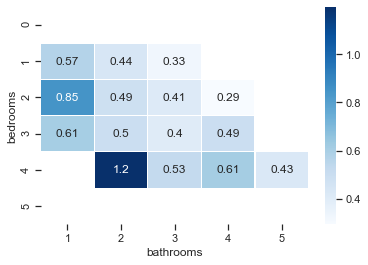

In [23]:
buy_priceAmount_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='priceAmount', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_priceAmount_per_bedroom_and_bathroom)

five_percent_rule = buy_priceAmount_per_bedroom_and_bathroom * 0.1 / 12

rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='priceAmount', index=['bedrooms'], 
                                                     columns=['bathrooms'], aggfunc=np.mean).round(2)
print(rent_price_per_bedroom_and_bathroom)

five_percent = rent_price_per_bedroom_and_bathroom / five_percent_rule

sns.heatmap(five_percent, annot=True, linewidths=.100, cmap='Blues')

In [25]:
print(five_percent_rule)

bathrooms            1             2             3             4             5
bedrooms                                                                      
1          5073.550000   8832.100833  11427.976167           NaN           NaN
2          4306.365000   8713.680250  12649.063250  13683.152750           NaN
3          9238.604167  10681.826583  14656.194250  19071.049083  19258.654000
4                  NaN   9712.500000  22894.166667  21906.191667  21780.022917
5                  NaN           NaN  17447.916667           NaN           NaN
